## Data Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import data_table
# enable interactive format for DataFrame
data_table.enable_dataframe_formatter()

In [ ]:
url = 'https://drive.google.com/file/d/1FRc6gSBhuXI2CrfUgujsh4Sw30g3YhVr/view?usp=sharing'
stockdata= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

In [ ]:
# read data
stocks=pd.read_csv(stockdata, index_col=0)

In [ ]:
stocks.head()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia
2013-09-06,13860.81,5144.0,9420.3480,8234.98,6547.33,22621.22,1655.08,14937.48
2013-09-09,14205.23,5179.4,9420.3480,8234.98,6530.74,22750.65,1655.08,14937.48
2013-09-10,14423.36,5198.9,9539.9320,8276.32,6583.99,22976.65,1671.71,15063.12
2013-09-11,14425.07,5230.6,9620.7100,8446.54,6588.43,22937.14,1683.99,15191.06
2013-09-12,14387.27,5238.2,9655.3774,8495.73,6588.98,22953.72,1689.13,15326.60


### Hitogram

We fist get the simple rate of return for hangseng.

In [ ]:
# transform hangseng price into the return rate
stocks["hangseng_return"]=stocks["hangseng"].pct_change()
stocks.head()

,nikkei,aord,nyse,dax,ftse,hangseng,sp500,djia,hangseng_return
2013-09-06,13860.81,5144.0,9420.3480,8234.98,6547.33,22621.22,1655.08,14937.48,NaN
2013-09-09,14205.23,5179.4,9420.3480,8234.98,6530.74,22750.65,1655.08,14937.48,0.005722
2013-09-10,14423.36,5198.9,9539.9320,8276.32,6583.99,22976.65,1671.71,15063.12,0.009934
2013-09-11,14425.07,5230.6,9620.7100,8446.54,6588.43,22937.14,1683.99,15191.06,-0.001720
2013-09-12,14387.27,5238.2,9655.3774,8495.73,6588.98,22953.72,1689.13,15326.60,0.000723


Text(0.5, 1.0, 'Simple Rate of Daily Return of Hengseng Index')

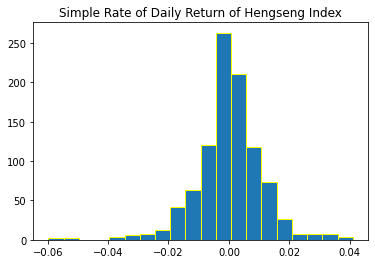

In [ ]:
#plot histogram
plt.hist(stocks["hangseng_return"], bins=20, edgecolor='yellow')
plt.title("Simple Rate of Daily Return of Hengseng Index")

### Scatter Plot

We want to check the pattern between the returns of S&P500 and Hangseng Indexs

In [ ]:
stocks["sp500_return"]=stocks["sp500"].pct_change()

Text(0.5, 1.0, 'Scatter Plot between returns of S&P500 and Hangseng indices ')

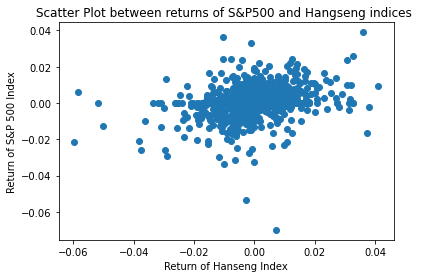

In [ ]:
plt.scatter(stocks["hangseng_return"],stocks["sp500_return"])
plt.ylabel("Return of S&P 500 Index")
plt.xlabel("Return of Hanseng Index")
plt.title("Scatter Plot between returns of S&P500 and Hangseng indices ")

### Scatter Matrix

In [ ]:
stocks["nikkei_return"]=stocks["nikkei"].pct_change()

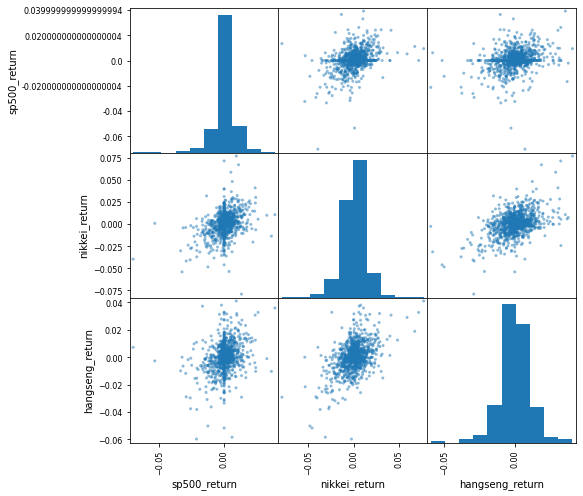

In [ ]:
pd.plotting.scatter_matrix(stocks[["sp500_return","nikkei_return","hangseng_return"]],figsize=(8,8))
plt.show()

### time series plot

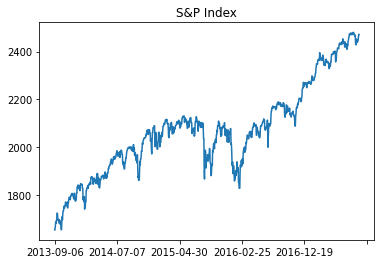

In [ ]:
plt.title("S&P Index")
stocks["sp500"].plot()

## Handling Missing values

### Fill missing values in time series

In [ ]:
sp500=stocks["sp500"]

In [ ]:
sp500.head(10)

2013-09-06    1655.08
2013-09-09    1655.08
2013-09-10    1671.71
2013-09-11    1683.99
2013-09-12    1689.13
2013-09-13    1683.42
2013-09-17    1697.60
2013-09-18    1704.76
2013-09-19    1725.52
2013-09-20    1722.34
Name: sp500, dtype: float64

In [ ]:
import numpy as np
sp500.loc["2013-09-09":"2013-09-10"]=np.nan # make two missing values

In [ ]:
sp500.head(10)

2013-09-06    1655.08
2013-09-09        NaN
2013-09-10        NaN
2013-09-11    1683.99
2013-09-12    1689.13
2013-09-13    1683.42
2013-09-17    1697.60
2013-09-18    1704.76
2013-09-19    1725.52
2013-09-20    1722.34
Name: sp500, dtype: float64

In [ ]:
sp500.fillna(method="bfill").head()

2013-09-06    1655.08
2013-09-09    1683.99
2013-09-10    1683.99
2013-09-11    1683.99
2013-09-12    1689.13
Name: sp500, dtype: float64

In [ ]:
sp500.fillna(method="ffill").head()

2013-09-06    1655.08
2013-09-09    1655.08
2013-09-10    1655.08
2013-09-11    1683.99
2013-09-12    1689.13
Name: sp500, dtype: float64

## Data Slicing and Selection

### Splitting into train and test

In [ ]:
stocks.shape

(973, 17)

In [ ]:
train_size=int(973*0.9)

In [ ]:
train_size

875

In [ ]:
test_size=973-train_size
test_size

98

In [ ]:
train=stocks.iloc[:train_size,:]

In [ ]:
test=stocks.iloc[train_size:,:]

In [ ]:
train[["sp500_return","nikkei_return","hangseng_return"]]

,sp500_return,nikkei_return,hangseng_return
2013-09-11,0.007346,0.000119,-0.001720
2013-09-12,0.003052,-0.002620,0.000723
2013-09-13,-0.003380,0.001209,-0.001675
2013-09-17,0.008423,-0.006456,0.011575
2013-09-18,0.004218,0.013534,-0.002721
...,...,...,...
2017-04-06,-0.003055,-0.014008,-0.005208
2017-04-07,0.001929,0.003633,-0.000264
2017-04-10,0.000000,0.007139,-0.000211
2017-04-11,-0.000140,-0.002660,-0.007160


In [ ]:
test[["sp500_return","nikkei_return","hangseng_return"]]

,sp500_return,nikkei_return,hangseng_return
2017-04-13,-0.003760,-0.006779,-0.002132
2017-04-14,-0.006815,-0.004950,0.000000
2017-04-17,0.000000,0.001071,0.000000
2017-04-18,0.008613,0.003450,-0.013895
2017-04-19,-0.002903,0.000739,-0.004124
...,...,...,...
2017-08-29,0.002161,-0.004491,-0.003527
2017-08-30,0.000843,0.007437,0.011871
2017-08-31,0.004615,0.007162,-0.004425
2017-09-01,0.005721,0.002302,-0.000613


### Select rows

In [ ]:
stocks.loc["2015-01-01":"2015-12-31",["sp500_return","nikkei_return","hangseng_return"] ]

,sp500_return,nikkei_return,hangseng_return
2015-01-05,0.000000,-0.002410,0.009371
2015-01-06,-0.033479,-0.030187,-0.009945
2015-01-07,-0.008893,0.000127,0.008339
2015-01-08,0.011630,0.016687,0.006514
2015-01-09,0.017888,0.001784,0.003542
...,...,...,...
2015-12-24,0.021344,-0.005136,0.014114
2015-12-25,-0.001599,-0.001098,0.000000
2015-12-28,0.000000,0.005556,-0.009870
2015-12-29,-0.002179,0.005769,0.003650


### Select with conditions

In [ ]:
stocks[stocks["sp500_return"]>0][["sp500_return","nikkei_return","hangseng_return"] ]

,sp500_return,nikkei_return,hangseng_return
2013-09-11,0.007346,0.000119,-0.001720
2013-09-12,0.003052,-0.002620,0.000723
2013-09-17,0.008423,-0.006456,0.011575
2013-09-18,0.004218,0.013534,-0.002721
2013-09-19,0.012178,0.017981,0.016657
...,...,...,...
2017-08-23,0.009941,0.002621,0.000000
2017-08-29,0.002161,-0.004491,-0.003527
2017-08-30,0.000843,0.007437,0.011871
2017-08-31,0.004615,0.007162,-0.004425
